In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [6]:
from pandas_datareader.data import DataReader
import yfinance as yf

In [7]:
from datetime import datetime

In [8]:
tech_list = ['5248.KL', '5305.KL']
tech_list = ['5248.KL', '5305.KL']

In [9]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [10]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
company_list = ['5248.KL', '5305.KL']
company_name = ["BAUTO", "SENHENG"]
for company, com_name in zip(company_list, company_name):
   globals()[company]["company_name"] = com_name
df = pd.concat([globals()[stock] for stock in company_list], axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-12 00:00:00+08:00,0.580,0.595,0.580,0.590,0.590,971800,SENHENG
2023-01-13 00:00:00+08:00,0.590,0.590,0.580,0.585,0.585,740900,SENHENG
2023-01-16 00:00:00+08:00,0.585,0.585,0.580,0.580,0.580,393900,SENHENG
2023-01-17 00:00:00+08:00,0.580,0.590,0.580,0.585,0.585,632500,SENHENG
2023-01-18 00:00:00+08:00,0.580,0.580,0.570,0.575,0.575,554700,SENHENG
2023-01-19 00:00:00+08:00,0.575,0.580,0.570,0.575,0.575,261800,SENHENG
2023-01-20 00:00:00+08:00,0.570,0.580,0.570,0.570,0.570,268100,SENHENG
2023-01-25 00:00:00+08:00,0.575,0.580,0.570,0.570,0.570,1013400,SENHENG
2023-01-26 00:00:00+08:00,0.570,0.580,0.570,0.570,0.570,1214700,SENHENG


In [12]:
df[df['company_name'] == 'BAUTO'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,1.844835,1.870744,1.823306,1.845661,1.783631,1.737012e+06
std,0.132208,0.136984,0.129716,0.133863,0.159965,1.341170e+06
min,1.610000,1.640000,1.590000,1.620000,1.526429,1.208000e+05
25%,1.760000,1.780000,1.740000,1.760000,1.671382,8.070500e+05
50%,1.800000,1.820000,1.780000,1.800000,1.732788,1.432000e+06
75%,1.920000,1.940000,1.900000,1.920000,1.878460,2.311675e+06
max,2.230000,2.250000,2.180000,2.250000,2.213028,9.723000e+06


In [13]:
df[df['company_name'] == 'BAUTO'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2022-01-28 00:00:00+08:00 to 2023-01-27 00:00:00+08:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          242 non-null    float64
 1   High          242 non-null    float64
 2   Low           242 non-null    float64
 3   Close         242 non-null    float64
 4   Adj Close     242 non-null    float64
 5   Volume        242 non-null    int64  
 6   company_name  242 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.1+ KB


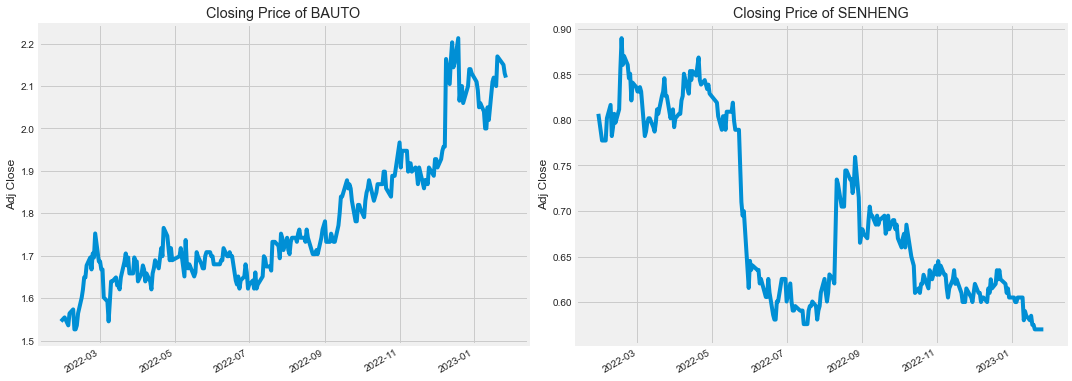

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    globals()[company]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

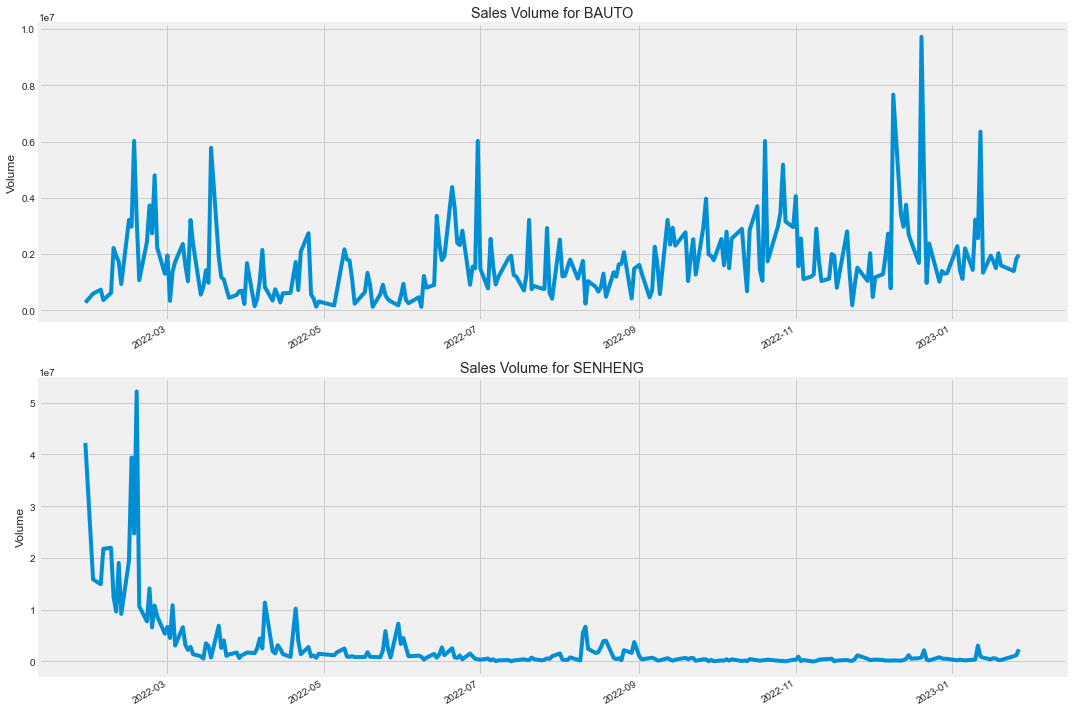

In [15]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 1, i)
    globals()[company]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

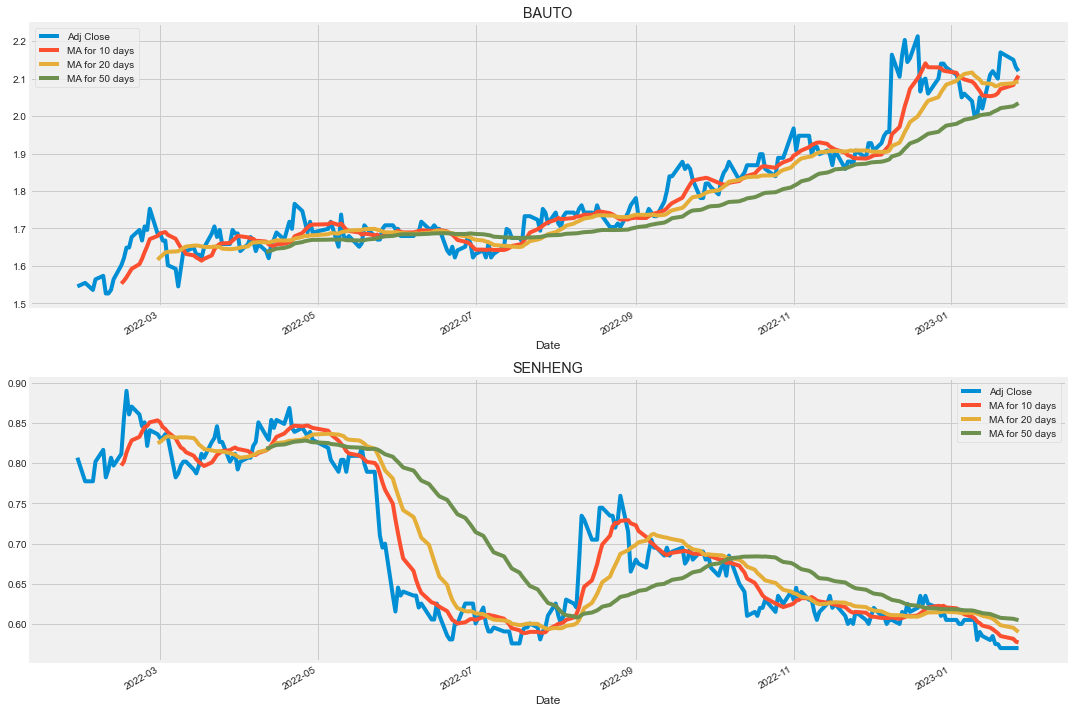

In [16]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        globals()[company][column_name] =  globals()[company]['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)
globals()['5248.KL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0]).set_title('BAUTO')
globals()['5305.KL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1]).set_title('SENHENG')
fig.tight_layout()

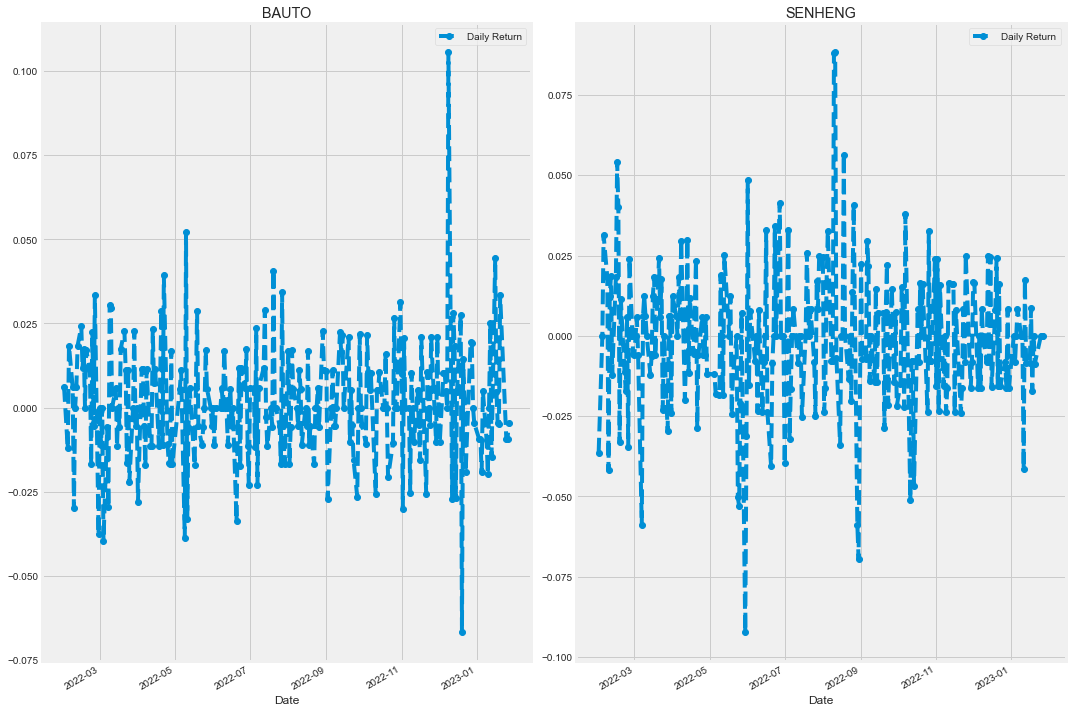

In [18]:
for company in company_list:
    globals()[company]['Daily Return'] = globals()[company]['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
globals()['5248.KL']['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('BAUTO')
globals()['5305.KL']['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('SENHENG')
fig.tight_layout()

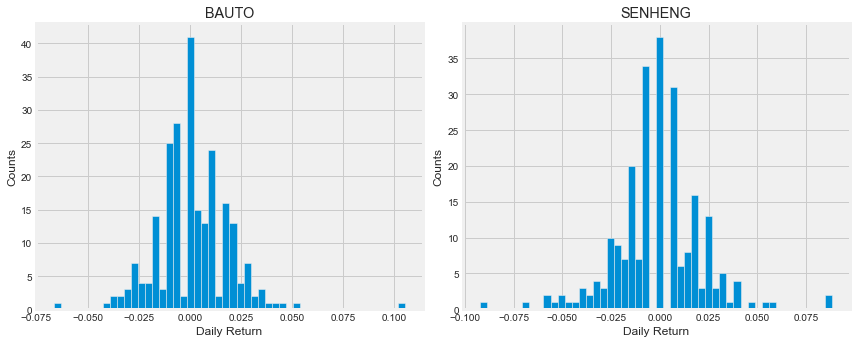

In [19]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    globals()[company]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

In [20]:
import pandas as pd
df1 = pd.DataFrame({'date': globals()[company_list[0]].index, 'BAUTO': globals()[company_list[0]]['Adj Close']})
df2 = pd.DataFrame({'date': globals()[company_list[1]].index, 'SENHENG': globals()[company_list[1]]['Adj Close']})
result = pd.merge(df1, df2, on='date')
result.set_index("date", inplace=True)
result_rets = result.pct_change()
result_rets.head()

,BAUTO,SENHENG
date,,
2022-01-28 00:00:00+08:00,NaN,NaN
2022-01-31 00:00:00+08:00,0.006097,-0.036364
2022-02-03 00:00:00+08:00,-0.012121,0.000000
2022-02-04 00:00:00+08:00,0.018405,0.031446
2022-02-07 00:00:00+08:00,0.006024,0.018293


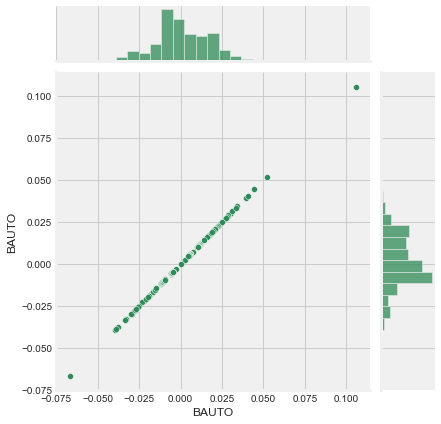

In [21]:
sns.jointplot(x='BAUTO', y='BAUTO', data=result_rets, kind='scatter', color='seagreen')

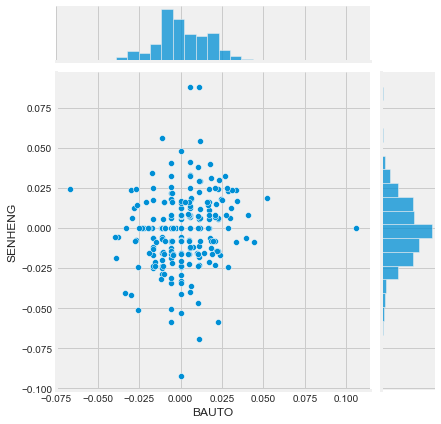

In [22]:
sns.jointplot(x='BAUTO', y='SENHENG', data=result_rets, kind='scatter')

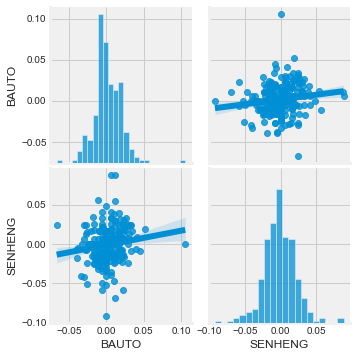

In [23]:
sns.pairplot(result_rets, kind='reg')

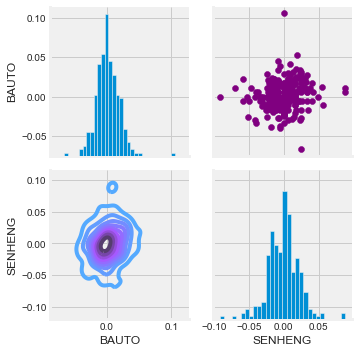

In [24]:
return_fig = sns.PairGrid(result_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

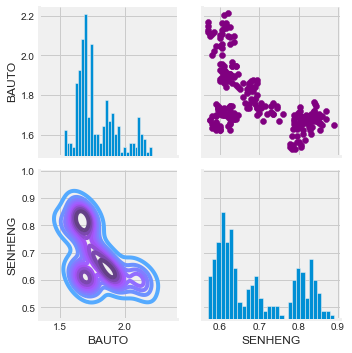

In [25]:
returns_fig = sns.PairGrid(result)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

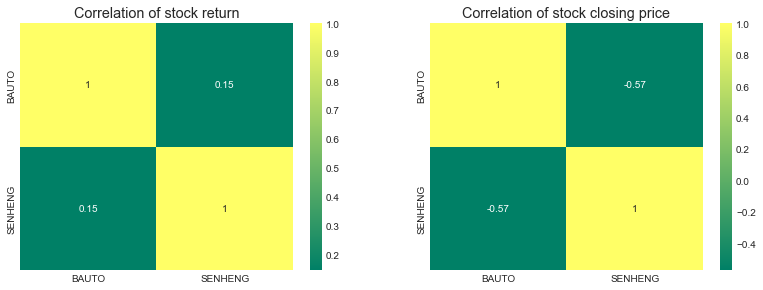

In [26]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(result_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(result.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

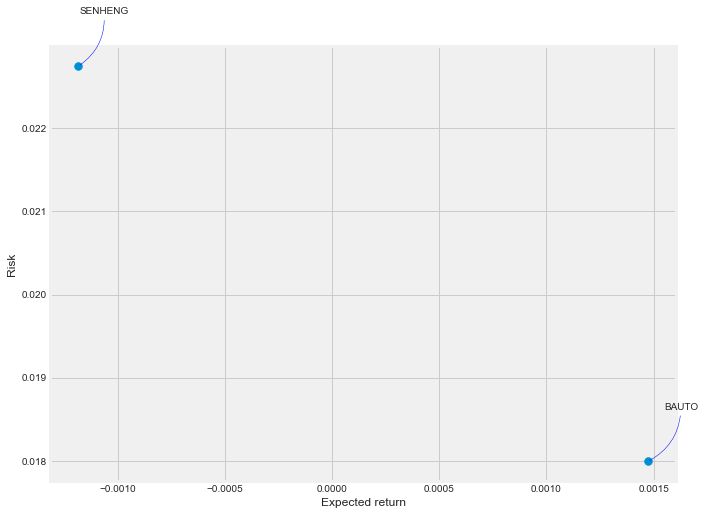

In [27]:
rets = result_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [28]:
date_range = {}
date_range["ten_years_ago"] = end.year - 10
start = datetime(date_range["ten_years_ago"], end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company = company_list[0]
df = pd.DataFrame({'date': globals()[company].index, 'High': globals()[company]['High'],'Low': globals()[company]['Low'],'Open': globals()[company]['Open'],'Close': globals()[company]['Close'], 'Volume': globals()[company]['Volume'], 'BAUTO': globals()[company]['Adj Close']})
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,date,High,Low,Open,Close,Volume,BAUTO
Date,,,,,,,
2013-11-18 00:00:00+08:00,2013-11-18 00:00:00+08:00,1.571428,1.092857,1.107142,1.300000,100860480,0.835282
2013-11-19 00:00:00+08:00,2013-11-19 00:00:00+08:00,1.392857,1.142857,1.342857,1.285714,19410160,0.826102
2013-11-20 00:00:00+08:00,2013-11-20 00:00:00+08:00,1.278571,1.142857,1.278571,1.142857,5880000,0.734313
2013-11-21 00:00:00+08:00,2013-11-21 00:00:00+08:00,1.150000,1.042857,1.150000,1.100000,11020940,0.706777
2013-11-22 00:00:00+08:00,2013-11-22 00:00:00+08:00,1.135714,1.042857,1.100000,1.057142,3752700,0.679240
...,...,...,...,...,...,...,...
2023-01-19 00:00:00+08:00,2023-01-19 00:00:00+08:00,2.150000,2.080000,2.140000,2.100000,2028900,2.100000
2023-01-20 00:00:00+08:00,2023-01-20 00:00:00+08:00,2.180000,2.100000,2.100000,2.170000,1594200,2.170000
2023-01-25 00:00:00+08:00,2023-01-25 00:00:00+08:00,2.180000,2.120000,2.180000,2.150000,1392500,2.150000


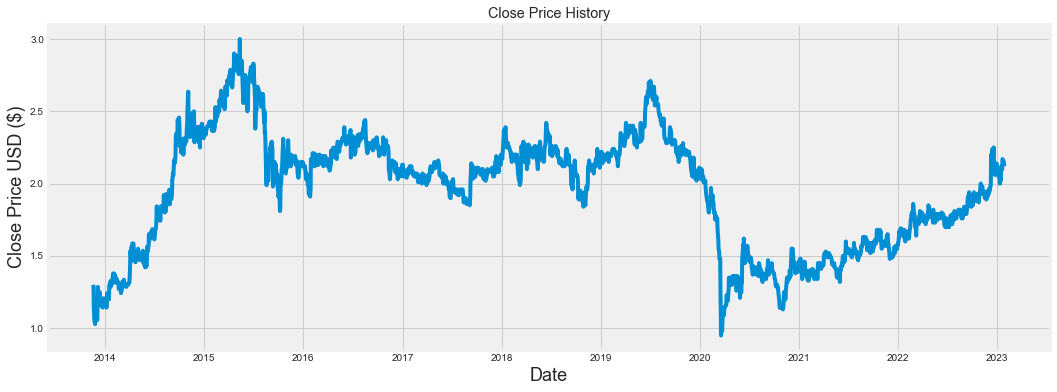

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2155

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.17073169],
       [0.16376295],
       [0.09407657],
       ...,
       [0.5853659 ],
       [0.57560981],
       [0.57073165]])

In [32]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.17073169, 0.16376295, 0.09407657, 0.07317075, 0.05226441,
       0.03832733, 0.08013903, 0.07665463, 0.06968635, 0.06620195,
       0.05226441, 0.05226441, 0.11149805, 0.16376295, 0.13240393,
       0.14634147, 0.11846685, 0.14634147, 0.13937267, 0.12195125,
       0.1010449 , 0.11846685, 0.11149805, 0.10452925, 0.1010449 ,
       0.09407657, 0.10452925, 0.12543512, 0.12543512, 0.11498245,
       0.11149805, 0.1010449 , 0.1010449 , 0.09407657, 0.09756097,
       0.14285707, 0.12543512, 0.12195125, 0.13937267, 0.12195125,
       0.16724735, 0.18118437, 0.16376295, 0.18466877, 0.18466877,
       0.17770002, 0.17421562, 0.17770002, 0.19860584, 0.20905905,
       0.20905905, 0.19163757, 0.18466877, 0.19860584, 0.20209024,
       0.17770002, 0.19163757, 0.18466877, 0.18815317, 0.17770002])]
[0.18118436638213153]

[array([0.17073169, 0.16376295, 0.09407657, 0.07317075, 0.05226441,
       0.03832733, 0.08013903, 0.07665463, 0.06968635, 0.06620195,
       0.05226441, 0.05226441, 0.11

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2095/2095 [==============================] - 74s 33ms/step - loss: 0.0020


In [34]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 36ms/step


0.0461511450177541

C:\Users\udayk\AppData\Local\Temp/ipykernel_15744/2882300990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


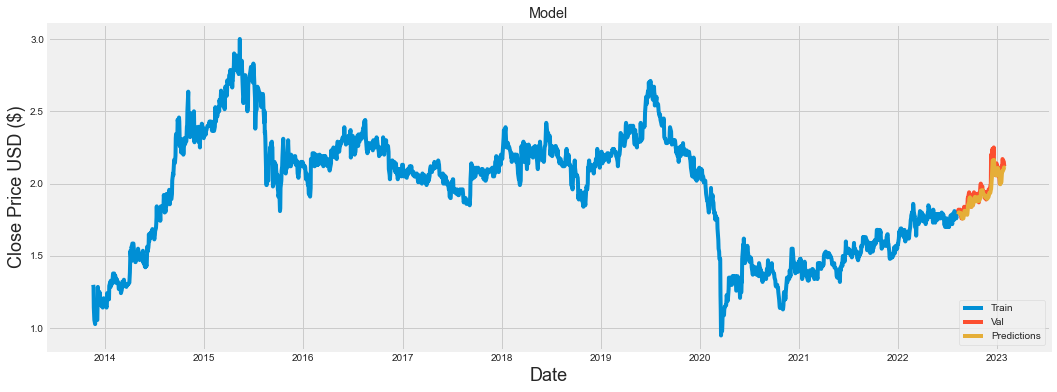

In [35]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
valid

,Close,Predictions
Date,,
2022-08-10 00:00:00+08:00,1.81,1.787238
2022-08-11 00:00:00+08:00,1.82,1.792756
2022-08-12 00:00:00+08:00,1.80,1.800715
2022-08-15 00:00:00+08:00,1.80,1.799168
2022-08-16 00:00:00+08:00,1.79,1.795614
...,...,...
2023-01-19 00:00:00+08:00,2.10,2.084692
2023-01-20 00:00:00+08:00,2.17,2.082973
2023-01-25 00:00:00+08:00,2.15,2.103007
